In [1]:
from CommonImports import *
from TopologySelectionAutomation import getBidirectionalCapacityConstraints, getFlowTopologyConstraints, printSolutionValues, singleCommodityFlow

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

Two matrices print at the end of the notebook. The first matrix is the flow values and the second matrix is the topology control variables. Each row represents node i and each column represents node j s.t. i!=j. For example, if n=4, then the output matrix is: 

[x12 x13 x14]<br>
[x21 x23 x24]<br>
[x31 x32 x34]<br>
[x41 x42 x43]<br>

In [2]:
#import capacities matrix or work with reduced matrix
capacities = np.load('capacity_filtered.npy')

In [3]:
print(capacities.shape)

(23384, 4, 4)


In [4]:
#import flight ids 
flight_ids = np.load('flt_ids_reduced.npy')
print(flight_ids)

['LN-172' 'LN-179' 'LN-201' 'LN-207']


### Solve for One Time Step - Single Commodity

In [5]:
capacity = capacities[5000, :, :]
print(capacity)

#need for generating a commodity value
max_cap = capacity.max()
min_cap = capacity.min()

[[  0. 390. 195. 987.]
 [390.   0. 987. 588.]
 [195. 987.   0. 390.]
 [987. 588. 390.   0.]]


In [6]:
#select source and destination node
#if rho == 0 then source and destination do not have a non-zero capacity path

source = 1
dest = 4
T=2

L_k = 48.0
print('Commodity = ', L_k)

num_nodes = capacity.shape[0]
print(num_nodes)


rho, topology_vals = singleCommodityFlow(num_nodes, source, dest, L_k, T, capacity)

Commodity =  48.0
4


### Solve for Multiple Time Steps - Single Commodity

In [7]:
num_nodes = capacities.shape[1]
source = 1
dest = 4
T=2

max_cap = 987
min_cap = 48

rho_hist = np.zeros(capacities.shape[0],)
topo_hist = np.zeros((capacities.shape[0], num_nodes, num_nodes-1))

Lk_hist = 48.0

start_time = time.time()
for i in range(0, capacities.shape[0]):
    #L_k = Lk_hist[i]

    rho, topology_vals = singleCommodityFlow(num_nodes, source, dest, Lk_hist, T, capacities[i, :, :])
    rho_hist[i] = rho
    topo_hist[i] = topology_vals
    
    if i % 1000 == 999: 
        print('iteration = ', i)
        print('elpased time = ', time.time()-start_time)

iteration =  999
elpased time =  15.933079719543457
iteration =  1999
elpased time =  34.64720153808594
iteration =  2999
elpased time =  53.04865527153015
iteration =  3999
elpased time =  70.42454242706299
iteration =  4999
elpased time =  88.97541427612305
iteration =  5999
elpased time =  107.79148125648499
iteration =  6999
elpased time =  126.39608407020569
iteration =  7999
elpased time =  145.05203294754028
iteration =  8999
elpased time =  163.04502367973328
iteration =  9999
elpased time =  180.71420240402222
iteration =  10999
elpased time =  198.54693269729614
iteration =  11999
elpased time =  215.84698963165283
iteration =  12999
elpased time =  233.6200351715088
iteration =  13999
elpased time =  250.9000804424286
iteration =  14999
elpased time =  267.2741754055023
iteration =  15999
elpased time =  282.82334637641907
iteration =  16999
elpased time =  300.15518736839294
iteration =  17999
elpased time =  318.0829041004181
iteration =  18999
elpased time =  335.22501564

<IPython.core.display.Javascript object>


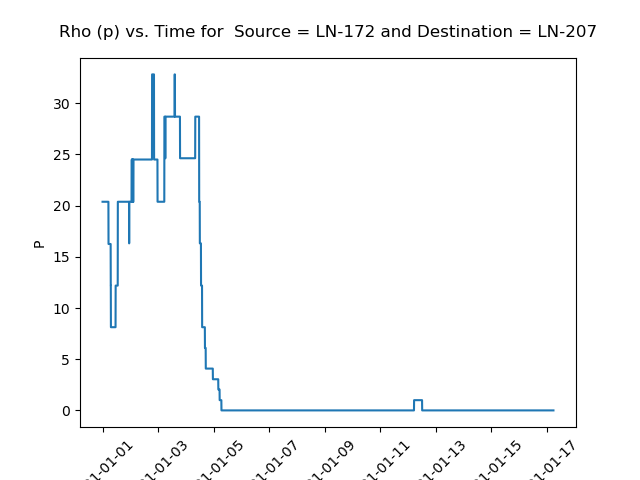

In [8]:
fname = 'Rho vs. Time.png'
fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('P')
ax.set_title(fig_title, pad=15)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
plt.savefig(fname, dpi = 300, bbox_inches='tight')

7200
7200


<IPython.core.display.Javascript object>


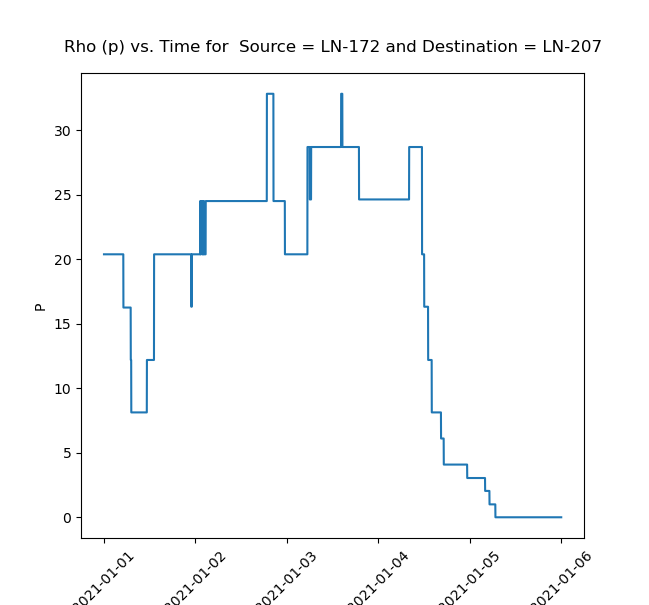

In [9]:
fname = 'Rho vs. Time_zoomed.png'
fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-06'), np.timedelta64(1, 'm'))

rho_zoom = rho_hist[0:len(times)]

print(len(times))
print(len(rho_zoom))

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('P')
ax.set_title(fig_title, pad=15)

ax.plot(times, rho_zoom, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
plt.savefig(fname, dpi = 300, bbox_inches='tight')

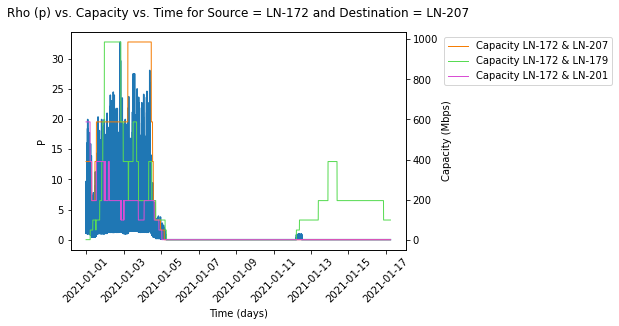

In [31]:
fname = 'Rho vs. Cap vs. Time.png'
fig_title = 'Rho (p) vs. Capacity vs. Time for Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('P')
ax.set_title(fig_title, pad=15)

ax2 = ax.twinx()
ax2.set_ylabel('Capacity (Mbps)')

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]


ax.plot(times, rho_hist, label ='p')
ax2.plot(times, capacities[:, source-1, dest-1], linewidth= 1, color='#f57d05', label='Capacity LN-172 & LN-207')
ax2.plot(times, capacities[:, source-1, 1], linewidth= 1, color='#58db53', label='Capacity LN-172 & LN-179')
ax2.plot(times, capacities[:, source-1, 2], linewidth= 1, color='#d94ed4', label='Capacity LN-172 & LN-201')

ax.tick_params(axis='x', labelrotation = 45)
plt.legend(bbox_to_anchor=(1.10, 1.0), ncol = 1, loc='upper left')
plt.savefig(fname, dpi = 300, bbox_inches='tight')

(24480,)
23383


<IPython.core.display.Javascript object>


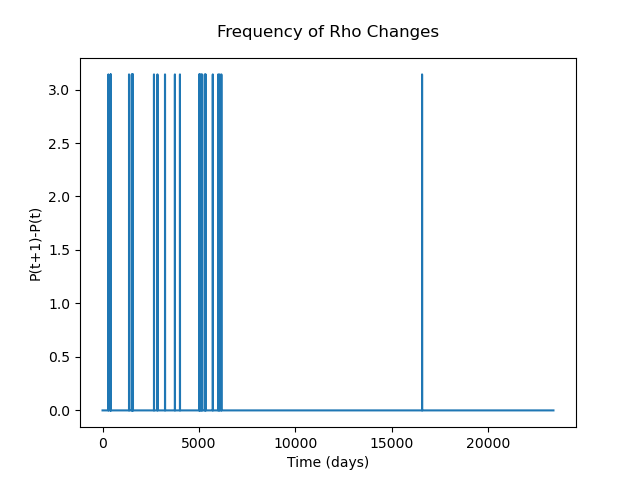

In [10]:
times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

#times = times[1:capacities.shape[0]+1]

diff_rho = np.angle(np.diff(rho_hist))

print(times.shape)
print(len(diff_rho))

fig_title = 'Frequency of Rho Changes'
fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('P(t+1)-P(t)')
ax.set_title(fig_title, pad=15)

ax.plot(diff_rho)


<IPython.core.display.Javascript object>


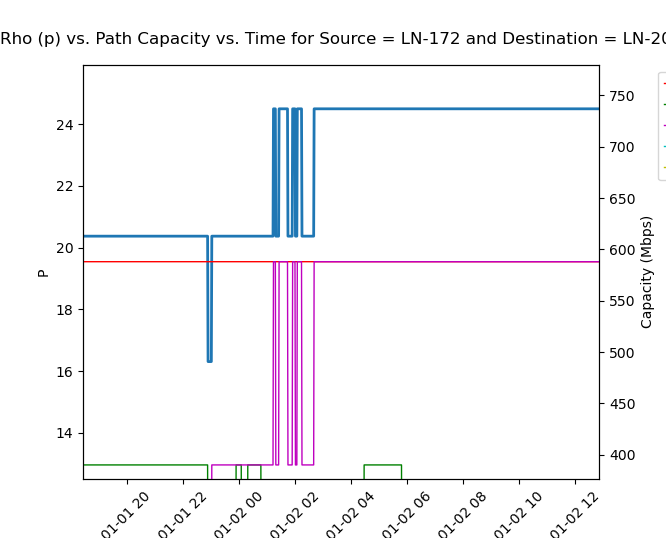

In [47]:
#plot path capcity over rho
path1 = capacities[:, 0, 3] #172-207

path2a = capacities[:, 0, 2] #172-201
path2b = capacities[:, 2, 3] #201-207
path2 = np.minimum(path2a, path2b) #172-201-207

path3a = capacities[:, 0, 1] #172-179
path3b = capacities[:, 1, 3] #179-207
path3 = np.minimum(path3a, path3b) #172-179-207

path4a = capacities[:, 0, 1] #172-179
path4b = capacities[:, 1, 2] #179-201
path4c = capacities[:, 2, 3] #201-207
path4d = np.minimum(path4a, path4b)
path4 = np.minimum(path4d, path4c)

path5a = capacities[:, 0, 2]#172-201
path5b = capacities[:, 2, 1]#201-179
path5c = capacities[:, 1, 3]#179-207
path5d = np.minimum(path5a, path5b)
path5 = np.minimum(path5d, path5c)

#figure settings
fname = 'Rho vs. Link Cap vs. Time zoomed.png'
fig_title = 'Rho (p) vs. Path Capacity vs. Time for Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('P')

ax2 = ax.twinx()
ax2.set_ylabel('Capacity (Mbps)')

ax.set_title(fig_title, pad=15)



times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-06'), np.timedelta64(1, 'm'))



ax.plot(times, rho_hist[0:len(times)], label ='p', linewidth = 2)
ax2.plot(times, path1[0:len(times)], linewidth= 1, color='r', label='Capacity LN-172 to LN-207')
ax2.plot(times, path2[0:len(times)], linewidth= 1, color='g', label='Capacity LN-172 to LN-201 to LN-207')
ax2.plot(times, path3[0:len(times)], linewidth= 1, color='m', label='Capacity LN-172 to LN-179 to LN-207')
ax2.plot(times, path4[0:len(times)], linewidth= 1, color='c', label='Capacity LN-172 to LN-179 to LN-201 to LN-207')
ax2.plot(times, path5[0:len(times)], linewidth= 1, color='y', label='Capacity LN-172 to LN-201 to LN-179 to LN-207')

ax.tick_params(axis='x', labelrotation = 45)
plt.legend(bbox_to_anchor=(1.10, 1.0), ncol = 1, loc='upper left')
plt.savefig(fname, dpi = 300, bbox_inches='tight')

Not working yet, ignore

<IPython.core.display.Javascript object>


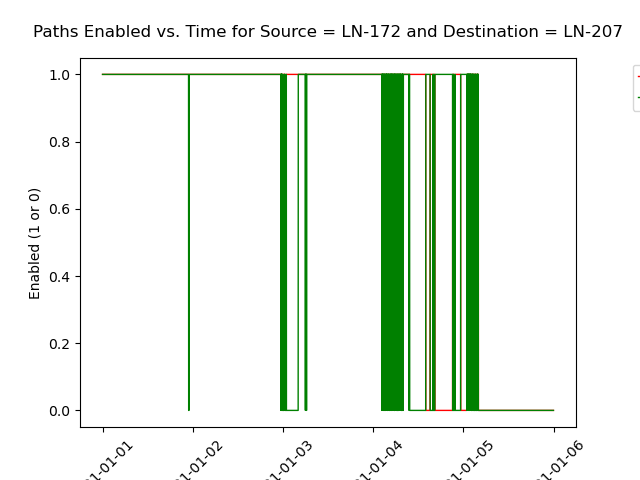

In [52]:
path1 = topo_hist[:, 0, 2] #z14 -> 172-207
path1 = [1 if i==True else 0 for i in path1]

path2a = topo_hist[:, 0, 1] #z13, 172-201
path2b = topo_hist[:, 2, 2] #z34, 201-207
#path2 = np.equal(path2a, path2b) #172-201-207
path2 = path2a == path2b
path2 = [1 if i == True else 0 for i in path2]

path3a = capacities[:, 0, 0] #z12, 172-179
path3b = capacities[:, 1, 2] #z24, 179-207
path3 = np.equal(path3a, path3b) #172-179-207
path3 = [1 if i == True else 0 for i in path3]

path4a = capacities[:, 0, 0] #z12, 172-179
path4b = capacities[:, 1, 1] #z23, 179-201
path4c = capacities[:, 2, 2] #z34, 201-207
path4d = np.equal(path4a, path4b)
path4 = np.equal(path4d, path4c)
path4 = [1 if i == True else 0 for i in path4]

path5a = capacities[:, 0, 1]#z13, 172-201
path5b = capacities[:, 2, 1]#z32, 201-179
path5c = capacities[:, 1, 2]#z24, 179-207
path5d = np.equal(path5a, path5b)
path5 = np.equal(path5d, path5c)
path5 = [1 if i == True else 0 for i in path5]

#figure settings
fname = 'Path Enabled vs. Time zoomed.png'
fig_title = 'Paths Enabled vs. Time for Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Enabled (1 or 0)')

ax.set_title(fig_title, pad=15)


times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-06'), np.timedelta64(1, 'm'))

ax.plot(times, path1[0:len(times)], linewidth= 1, color='r', label='Capacity LN-172 to LN-207')
ax.plot(times, path2[0:len(times)], linewidth= 1, color='g', label='Capacity LN-172 to LN-201 to LN-207')
#ax.plot(times, path3[0:len(times)], linewidth= 1, color='m', label='Capacity LN-172 to LN-179 to LN-207')
#ax.plot(times, path4[0:len(times)], linewidth= 1, color='c', label='Capacity LN-172 to LN-179 to LN-201 to LN-207')
#ax.plot(times, path5[0:len(times)], linewidth= 1, color='y', label='Capacity LN-172 to LN-201 to LN-179 to LN-207')

ax.tick_params(axis='x', labelrotation = 45)
plt.legend(bbox_to_anchor=(1.10, 1.0), ncol = 1, loc='upper left')
plt.savefig(fname, dpi = 300, bbox_inches='tight')

<IPython.core.display.Javascript object>


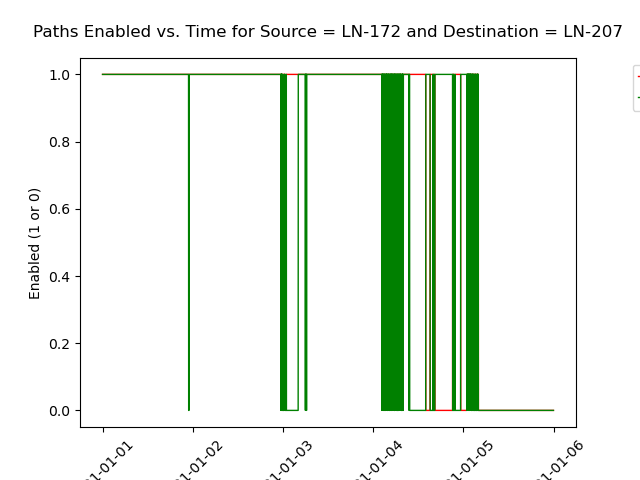

In [53]:
path1 = topo_hist[:, 0, 2] #z14 -> 172-207
path1 = [1 if i==True else 0 for i in path1]

path2a = topo_hist[:, 0, 1] #z13, 172-201
path2b = topo_hist[:, 2, 2] #z34, 201-207
path2 = np.equal(path2a, path2b) #172-201-207
#path2 = path2a == path2b
path2 = [1 if i == True else 0 for i in path2]

path3a = capacities[:, 0, 0] #z12, 172-179
path3b = capacities[:, 1, 2] #z24, 179-207
path3 = np.equal(path3a, path3b) #172-179-207
path3 = [1 if i == True else 0 for i in path3]

path4a = capacities[:, 0, 0] #z12, 172-179
path4b = capacities[:, 1, 1] #z23, 179-201
path4c = capacities[:, 2, 2] #z34, 201-207
path4d = np.equal(path4a, path4b)
path4 = np.equal(path4d, path4c)
path4 = [1 if i == True else 0 for i in path4]

path5a = capacities[:, 0, 1]#z13, 172-201
path5b = capacities[:, 2, 1]#z32, 201-179
path5c = capacities[:, 1, 2]#z24, 179-207
path5d = np.equal(path5a, path5b)
path5 = np.equal(path5d, path5c)
path5 = [1 if i == True else 0 for i in path5]

#figure settings
fname = 'Path Enabled vs. Time zoomed.png'
fig_title = 'Paths Enabled vs. Time for Source = %s and Destination = %s' %(flight_ids[source-1], flight_ids[dest-1])

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Enabled (1 or 0)')

ax.set_title(fig_title, pad=15)


times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-06'), np.timedelta64(1, 'm'))

ax.plot(times, path1[0:len(times)], linewidth= 1, color='r', label='Capacity LN-172 to LN-207')
ax.plot(times, path2[0:len(times)], linewidth= 1, color='g', label='Capacity LN-172 to LN-201 to LN-207')
#ax.plot(times, path3[0:len(times)], linewidth= 1, color='m', label='Capacity LN-172 to LN-179 to LN-207')
#ax.plot(times, path4[0:len(times)], linewidth= 1, color='c', label='Capacity LN-172 to LN-179 to LN-201 to LN-207')
#ax.plot(times, path5[0:len(times)], linewidth= 1, color='y', label='Capacity LN-172 to LN-201 to LN-179 to LN-207')

ax.tick_params(axis='x', labelrotation = 45)
plt.legend(bbox_to_anchor=(1.10, 1.0), ncol = 1, loc='upper left')
plt.savefig(fname, dpi = 300, bbox_inches='tight')